In [0]:
from google.colab import drive
drive.mount('/content/drive')opx0df2

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
files_zip_path = "/content/drive/My Drive/rsna-pneumonia-detection-challenge.zip"

import zipfile
#This extracts the files to the current working directory
archive = zipfile.ZipFile(files_zip_path, 'r')
archive.extractall()
!ls

 drive				        stage_2_sample_submission.csv
'GCP Credits Request Link - RSNA.txt'   stage_2_test_images
 sample_data			        stage_2_train_images
 stage_2_detailed_class_info.csv        stage_2_train_labels.csv


In [0]:
import pandas as pd
import pylab

In [0]:
project_path = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/'
df = pd.read_csv(project_path + 'stage_2_detailed_class_info.csv')
print(df.iloc[0])

patientId    0004cfab-14fd-4e49-80ba-63a80b6bddd6
class                No Lung Opacity / Not Normal
Name: 0, dtype: object


In [0]:
df.shape

(30227, 2)

In [0]:
df.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [0]:
df.describe(include = 'all')

,patientId,class
count,30227,30227
unique,26684,3
top,31764d54-ea3b-434f-bae2-8c579ed13799,No Lung Opacity / Not Normal
freq,4,11821


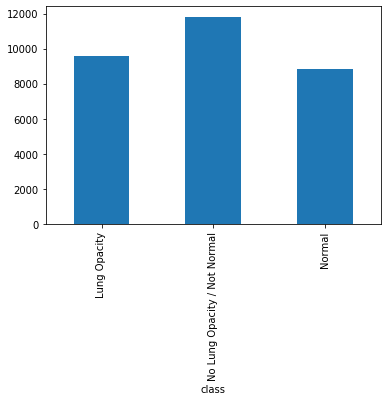

In [0]:
#print(df['patientId'].value_counts().shape[0], 'patient cases')
df.groupby('class').size().plot.bar()

In [0]:
data_train = pd.read_csv(project_path + 'stage_2_train_labels.csv')
print(data_train.iloc[0])

patientId    0004cfab-14fd-4e49-80ba-63a80b6bddd6
x                                             NaN
y                                             NaN
width                                         NaN
height                                        NaN
Target                                          0
Name: 0, dtype: object


In [0]:
data_train.shape

(30227, 6)

In [0]:
data_train.head(10)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


The NaN value above implies that these are patients for whom lung opacity was not found as there are no bounding box parameters

In [0]:
data_train.describe(include = 'all')

,patientId,x,y,width,height,Target
count,30227,9555.000000,9555.000000,9555.000000,9555.000000,30227.000000
unique,26684,NaN,NaN,NaN,NaN,NaN
top,31764d54-ea3b-434f-bae2-8c579ed13799,NaN,NaN,NaN,NaN,NaN
freq,4,NaN,NaN,NaN,NaN,NaN
mean,NaN,394.047724,366.839560,218.471376,329.269702,0.316108
std,NaN,204.574172,148.940488,59.289475,157.750755,0.464963
min,NaN,2.000000,2.000000,40.000000,45.000000,0.000000
25%,NaN,207.000000,249.000000,177.000000,203.000000,0.000000
50%,NaN,324.000000,365.000000,217.000000,298.000000,0.000000
75%,NaN,594.000000,478.500000,259.000000,438.000000,1.000000


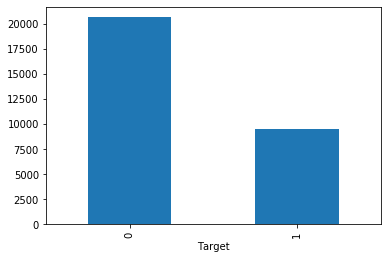

In [0]:
data_train.groupby('Target').size().plot.bar()

**Merge the Class detail and train dataset**

Combine the dataset to have class details with target 

In [0]:
Merged_df = pd.concat([data_train, df.drop('patientId',1)], 1)
print(Merged_df.shape[0], 'combined cases')
Merged_df.sample(15)

30227 combined cases


,patientId,x,y,width,height,Target,class
15648,98a9129c-b79e-40a0-9145-7ea04332006a,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
14622,9028eb5b-b7e7-441f-990b-f698cc405c05,NaN,NaN,NaN,NaN,0,Normal
6929,52d0b7e0-d81c-4579-be4b-a07e9124fd4e,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
11575,780f59c5-1e76-4082-9519-d7ed2f4c6620,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
30191,c109061a-d815-4cae-8343-9230d8024adf,84.0,285.0,227.0,432.0,1,Lung Opacity
25165,e199c5fb-1418-4803-b274-c2890ec14030,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1604,1769ed43-31b6-4cab-8ac2-4a8e096fd378,NaN,NaN,NaN,NaN,0,Normal
10705,714ade0c-e980-40b8-a08f-0c87a20ed45d,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
10540,6fea2431-de26-4d6d-adf8-ab61aac2d23c,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
24065,d85b98d0-f007-4ac6-bd32-e7e2d705aa79,NaN,NaN,NaN,NaN,0,Normal


In [0]:
Merged_df.shape

(30227, 7)

**Checking Missing Data**

In [0]:
Merged_df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
patientId    30227 non-null object
x            9555 non-null float64
y            9555 non-null float64
width        9555 non-null float64
height       9555 non-null float64
Target       30227 non-null int64
class        30227 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


**Inference** : Bounding box co-ordinates and parameters are missing for some patients. These patients must be normal with no abnormality or opacity in the lungs.

**Inference** : There are no values missing for Pateint ID, Target and Class. For Bounding box parameters there are 9555 non-null values for which lung opacity is found.

**Merging and Checking for Duplicate records**

In [0]:
Merged_df_Dups = Merged_df.groupby(['patientId']).size().reset_index(name='count')
print(Merged_df)

                                  patientId  ...                         class
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6  ...  No Lung Opacity / Not Normal
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd  ...  No Lung Opacity / Not Normal
2      00322d4d-1c29-4943-afc9-b6754be640eb  ...  No Lung Opacity / Not Normal
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5  ...                        Normal
4      00436515-870c-4b36-a041-de91049b9ab4  ...                  Lung Opacity
...                                     ...  ...                           ...
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  ...                  Lung Opacity
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba  ...                        Normal
30224  c1f6b555-2eb1-4231-98f6-50a963976431  ...                        Normal
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a  ...                  Lung Opacity
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  ...                  Lung Opacity

[30227 rows x 7 columns]


In [0]:
Merged_df_Dups.shape

(26684, 2)

**Dropping the Duplicates**

**Inference** : Based on the data above no duplication of row was found. Yet there could be 1 or more records against a patient ID with lung opacity for bounding boxes

**No. of Bounding box associated with the Images**

In [0]:
BB_df = Merged_df.groupby('patientId').\
    size().\
    reset_index(name='boxes')
comb_box_df = pd.merge(Merged_df, BB_df, on='patientId')
BB_df.\
    groupby('boxes').\
    size().\
    reset_index(name='patients')

,boxes,patients
0,1,23286
1,2,3266
2,3,119
3,4,13


**Inference** : Maximum bounding box associated with a patient ID is 4

In [0]:
Merged_df.groupby(['class', 'Target']).size().reset_index(name='Patient Count')

,class,Target,Patient Count
0,Lung Opacity,1,9555
1,No Lung Opacity / Not Normal,0,11821
2,Normal,0,8851


**Inference** : Only class with Lung opacity is marked as 1 which are 9555 records


**Visualization**

In [0]:
#Merged_df.duplicated(subset=None, keep='first')

**Bounding** **Boxes**

**Model**